## EXPERIMENT 2_1: MagFace

In [1]:
## Load libraries

import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import normalize
import sys
sns.set(style="white")
%matplotlib inline
sys.path.append('../../utils')
from Model_utils.Model_funcs import *
from Result_metric_utils.result_metrics import *
from Data_proc_utils.Data_proc_funcs import *
from DET_utils.DET_plots import *
from DET_utils.DET import *
from Plotting_stats_utils.plotting_threshold import *
from Plotting_stats_utils.stats_tables import *
from IPython import embed

from scipy.stats import describe, gaussian_kde
import math


In [2]:
# Save figures
from matplotlib import pyplot as plt
save_fig_path = '../../figures/mag_2_1/'


### MagFace Results

This notebook loads the feature vectors from MagFace and run them through the results metrics:
FNIR, FPIR, FND, FPD, and GARBE

# Load data

In [3]:
feature_list_children = '../../data/data_full/feature_vectors/magface_feature_vectors/2.1/feature_vectors_from_children_filtered_bibel_FINAL_INFERENCE_finetuning_ex_2_1_ofsi_final.list'
feature_list_adults = '../../data/data_full/feature_vectors/magface_feature_vectors/2.1/feature_vectors_from_adults_bibel_cropped_retina_all_FINAL_INFERENCE_finetuning_ex_2_1_ofsi_final.list'

def load_and_compute_similarity(feature_list, dtype=np.float32):
    # Load data
    image_names, ids, num_ids, norm_feats = load_magface_vectors(feature_list)

    # Convert dtype to reduce memory usage
    norm_feats = norm_feats.astype(dtype)

    # Compute similarity matrix incrementally if possible
    sim_mat = np.dot(norm_feats, norm_feats.T)

    return image_names, ids, num_ids, sim_mat


In [4]:
# Load and compute for children
image_names_c, ids_c, num_ids_c, sim_mat_c = load_and_compute_similarity(feature_list_children)


/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_5.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_1.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_2.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_m.04n3v0_/m.04n3v0__0002.jpg
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_1.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_3.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_2.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_344/Asian_344_19.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_344/Asian_344_21.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_167/Caucasian_167_26.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_167/Caucasian_167_38.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_16

In [5]:

# Load and compute for adults
image_names_a, ids_a, num_ids_a, sim_mat_a = load_and_compute_similarity(feature_list_adults)


/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.02nrz2/m.02nrz2_0003.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.02nrz2/m.02nrz2_0001.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.02nrz2/m.02nrz2_0004.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.01241v/m.01241v_0002.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/African_m.05zn751/m.05zn751_0001.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/African_m.05zn751/m.05zn751_0002.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/African_m.05zn751/m.05zn751_0004.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.04n3v0_/m.04n3v0__0001.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.0kvkdqp/m.0kvkdqp_0001.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.0kvkdqp/m.0kvkdqp_0004.jpg
/data/data_full/adults_filtered_bib

In [6]:


# Dataframes with info, removes names not in magface results
children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_children_df_BIBEL.csv')
children_all = children_all[children_all.image_name.isin(image_names_c)]

adults_all_org = pd.read_csv('../../data/image_info_csvs/final_filtered_adults_df_BIBEL.csv')
adults_all = adults_all_org[adults_all_org.image_name.isin(image_names_a)]

# Find the threshold

In [7]:
random_states = [1,2]
percentiles = np.arange(0.0, 1.0, 0.03).tolist()

df_all_threshold_x = compute_metrics_ex_1_1(random_states, percentiles, children_all, adults_all, image_names_c, image_names_a, sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE)


len(sim_mat_c) 7571
len(sim_mat_c_enrolled_0) 2174
enrolled_sim_mat.shape[0]2174
enrolled_sim_mat.shape[1]2174
M_d_set_len2174
neg_ref0.0
enrolled_sim_mat.shape[0]2063
enrolled_sim_mat.shape[1]2063
M_d_set_len2063
neg_ref0.0
NEW FPD result:  1.0555885164958554
NEW FND result:  0.0
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.0


/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:32: RuntimeWarning: invalid value encountered in scalar divide
  FND_GARBE = (np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2))


enrolled_sim_mat.shape[0]2174
enrolled_sim_mat.shape[1]2174
M_d_set_len2174
neg_ref0.0
enrolled_sim_mat.shape[0]2063
enrolled_sim_mat.shape[1]2063
M_d_set_len2063
neg_ref0.0
NEW FPD result:  1.08709664176232
NEW FND result:  0.0
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.03
enrolled_sim_mat.shape[0]2174
enrolled_sim_mat.shape[1]2174
M_d_set_len2174
neg_ref1.3333333333333333
enrolled_sim_mat.shape[0]2063
enrolled_sim_mat.shape[1]2063
M_d_set_len2063
neg_ref0.0
NEW FPD result:  1.128383156146939
NEW FND result:  613308800.981294
NEW GARBE result, GARBE close to 1 means more unfair:  0.19126997310662275
Done for random_state: 1, percentile: 0.06
enrolled_sim_mat.shape[0]2174
enrolled_sim_mat.shape[1]2174
M_d_set_len2174
neg_ref2.1333333333333333
enrolled_sim_mat.shape[0]2063
enrolled_sim_mat.shape[1]2063
M_d_set_len2063
neg_ref0.6666666666666666
NEW FPD result:  1.1790117381328649
NEW FND result:  3.0366145260217796
NEW GARBE result,

/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:31: RuntimeWarning: invalid value encountered in scalar divide
  FPD_GARBE = (np.abs(fpir_c -fpir_a))/(2*(2**2)*((fpir_c+fpir_a)/2))


enrolled_sim_mat.shape[0]2174
enrolled_sim_mat.shape[1]2174
M_d_set_len2174
neg_ref1277.0166666666616
enrolled_sim_mat.shape[0]2063
enrolled_sim_mat.shape[1]2063
M_d_set_len2063
neg_ref1256.966666666666
NEW FPD result:  0.0
NEW FND result:  1.0372597056777586
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.9299999999999999
enrolled_sim_mat.shape[0]2174
enrolled_sim_mat.shape[1]2174
M_d_set_len2174
neg_ref1286.5166666666623
enrolled_sim_mat.shape[0]2063
enrolled_sim_mat.shape[1]2063
M_d_set_len2063
neg_ref1265.4333333333327
NEW FPD result:  0.0
NEW FND result:  1.0365354629285142
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.96
enrolled_sim_mat.shape[0]2174
enrolled_sim_mat.shape[1]2174
M_d_set_len2174
neg_ref1292.249999999996
enrolled_sim_mat.shape[0]2063
enrolled_sim_mat.shape[1]2063
M_d_set_len2063
neg_ref1267.9999999999993
NEW FPD result:  0.0
NEW FND result:  1.0340297273513912
N

/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:32: RuntimeWarning: invalid value encountered in scalar divide
  FND_GARBE = (np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2))


enrolled_sim_mat.shape[0]2181
enrolled_sim_mat.shape[1]2181
M_d_set_len2181
neg_ref0.0
enrolled_sim_mat.shape[0]2113
enrolled_sim_mat.shape[1]2113
M_d_set_len2113
neg_ref0.0
NEW FPD result:  1.0804103476597655
NEW FND result:  0.0
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.03
enrolled_sim_mat.shape[0]2181
enrolled_sim_mat.shape[1]2181
M_d_set_len2181
neg_ref2.5
enrolled_sim_mat.shape[0]2113
enrolled_sim_mat.shape[1]2113
M_d_set_len2113
neg_ref0.0
NEW FPD result:  1.1185329910259956
NEW FND result:  1146263182.0265932
NEW GARBE result, GARBE close to 1 means more unfair:  0.19099690657194582
Done for random_state: 2, percentile: 0.06
enrolled_sim_mat.shape[0]2181
enrolled_sim_mat.shape[1]2181
M_d_set_len2181
neg_ref2.5
enrolled_sim_mat.shape[0]2113
enrolled_sim_mat.shape[1]2113
M_d_set_len2113
neg_ref0.0
NEW FPD result:  1.1656186709450098
NEW FND result:  1146263182.0265932
NEW GARBE result, GARBE close to 1 means more unfair:  0.

/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:31: RuntimeWarning: invalid value encountered in scalar divide
  FPD_GARBE = (np.abs(fpir_c -fpir_a))/(2*(2**2)*((fpir_c+fpir_a)/2))


enrolled_sim_mat.shape[0]2181
enrolled_sim_mat.shape[1]2181
M_d_set_len2181
neg_ref1190.9738095238044
enrolled_sim_mat.shape[0]2113
enrolled_sim_mat.shape[1]2113
M_d_set_len2113
neg_ref1203.3333333333283
NEW FPD result:  0.0
NEW FND result:  1.0428933654128045
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.84
enrolled_sim_mat.shape[0]2181
enrolled_sim_mat.shape[1]2181
M_d_set_len2181
neg_ref1227.8071428571388
enrolled_sim_mat.shape[0]2113
enrolled_sim_mat.shape[1]2113
M_d_set_len2113
neg_ref1247.3333333333312
NEW FPD result:  0.0
NEW FND result:  1.0485968321952472
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.87
enrolled_sim_mat.shape[0]2181
enrolled_sim_mat.shape[1]2181
M_d_set_len2181
neg_ref1251.2595238095207
enrolled_sim_mat.shape[0]2113
enrolled_sim_mat.shape[1]2113
M_d_set_len2113
neg_ref1278.6333333333312
NEW FPD result:  0.0
NEW FND result:  1.054762775946229
NEW GARBE resu

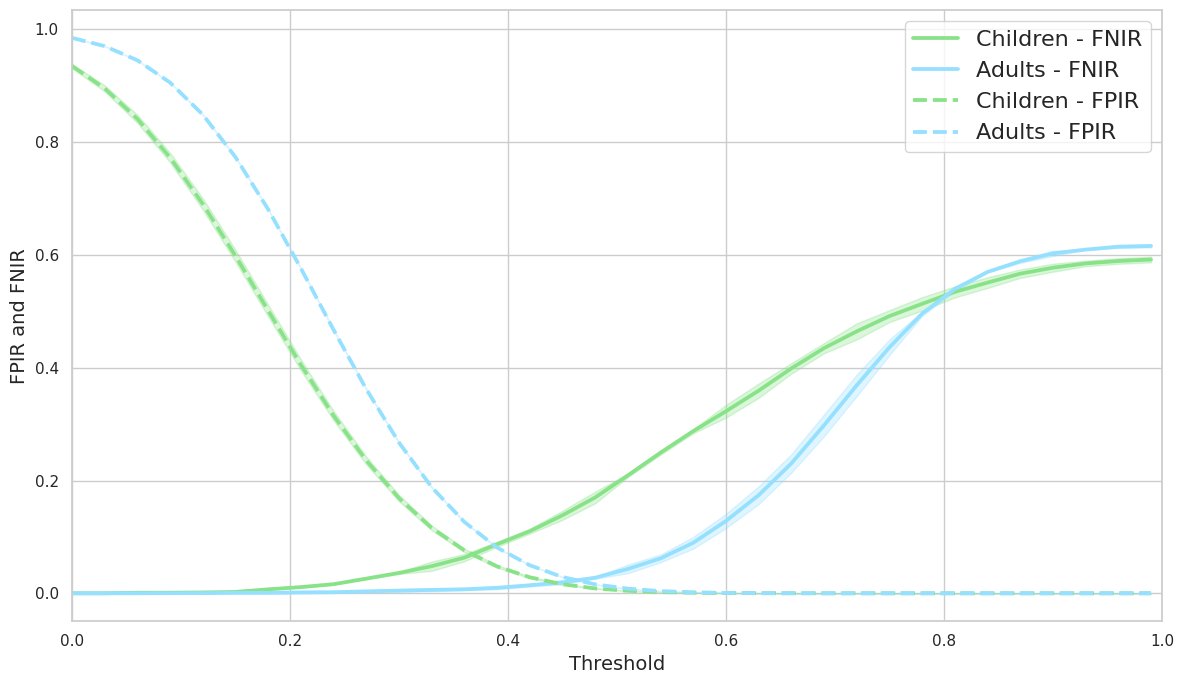

In [8]:

plot_threshold_metrics_ex_1_1_together_w_conf(df_all_threshold_x, 'MagFace ex. 2.1', save_fig_path)

# Stats - 10 experiments

In [9]:

random_states = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

df_all_results, sim_mat_dict_all_magface_ex1_1 = evaluate_metrics_ex_1_1(
    random_states, children_all, adults_all, image_names_c, image_names_a,
    sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data,
    balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, remove_ones, df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
)


len(sim_mat_c) 7571
len(sim_mat_c_reference_cols) 7571
len(sim_mat_c) 7571
len(sim_mat_c_enrolled_0) 2213
enrolled_sim_mat.shape[0]2213
enrolled_sim_mat.shape[1]2213
M_d_set_len2213
neg_ref88.92380952380955
enrolled_sim_mat.shape[0]2184
enrolled_sim_mat.shape[1]2184
M_d_set_len2184
neg_ref16.0
len(children_all)7817
len(sim_mat_c_non_enrolled_0) 2213
len(num_ids_c_non_enrolled) 2213
len(num_ids_c_reference) 3210
NEW FPD result:  1.6707075773600364
NEW FND result:  5.484907364818415
NEW GARBE result, GARBE close to 1 means more unfair:  0.1453693464055959
done
len(sim_mat_c) 7571
len(sim_mat_c_reference_cols) 7571
len(sim_mat_c) 7571
len(sim_mat_c_enrolled_0) 2169
enrolled_sim_mat.shape[0]2169
enrolled_sim_mat.shape[1]2169
M_d_set_len2169
neg_ref90.67142857142856
enrolled_sim_mat.shape[0]2137
enrolled_sim_mat.shape[1]2137
M_d_set_len2137
neg_ref21.46666666666666
len(children_all)7817
len(sim_mat_c_non_enrolled_0) 2169
len(num_ids_c_non_enrolled) 2169
len(num_ids_c_reference) 3210
NEW FPD

In [10]:
# Generate the LaTeX table
latex_table = generate_latex_table(df_all_results.applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)

\begin{table}
\caption{Descriptive Statistics} 
\label{table:descriptive_stats} 
\begin{tabular}{ccccccccc} 
\toprule
\textbf{{Iter.}} & $FNIR_c$ & $FNIR_a$ & $FPIR_c$ & $FPIR_a$ & $FPD$ & $FND$ & $GARBE$ & $T$ \\
\midrule
\textbf{0} & 0.040 & 0.007 & 0.114 & 0.190 & 1.671 & 5.485 & 0.145 & 0.330 \\
\textbf{1} & 0.042 & 0.010 & 0.114 & 0.190 & 1.663 & 4.162 & 0.130 & 0.330 \\
\textbf{2} & 0.044 & 0.005 & 0.112 & 0.188 & 1.683 & 9.374 & 0.167 & 0.330 \\
\textbf{3} & 0.045 & 0.008 & 0.113 & 0.187 & 1.647 & 5.639 & 0.146 & 0.330 \\
\textbf{4} & 0.044 & 0.007 & 0.118 & 0.190 & 1.609 & 6.255 & 0.150 & 0.330 \\
\textbf{5} & 0.045 & 0.010 & 0.114 & 0.188 & 1.646 & 4.669 & 0.137 & 0.330 \\
\textbf{6} & 0.044 & 0.007 & 0.113 & 0.191 & 1.694 & 6.523 & 0.154 & 0.330 \\
\textbf{7} & 0.053 & 0.005 & 0.115 & 0.187 & 1.622 & 11.183 & 0.172 & 0.330 \\
\textbf{8} & 0.048 & 0.006 & 0.111 & 0.191 & 1.723 & 7.500 & 0.160 & 0.330 \\
\textbf{9} & 0.048 & 0.004 & 0.114 & 0.194 & 1.698 & 11.529 & 0.174 & 0.33

/tmp/ipykernel_20670/3395561937.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  latex_table = generate_latex_table(df_all_results.applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))


In [11]:
latex_table = generate_latex_table(df_all_results.describe().applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)

\begin{table}
\caption{Descriptive Statistics} 
\label{table:descriptive_stats} 
\begin{tabular}{ccccccccc} 
\toprule
\textbf{{Iter.}} & $FNIR_c$ & $FNIR_a$ & $FPIR_c$ & $FPIR_a$ & $FPD$ & $FND$ & $GARBE$ & $T$ \\
\midrule
\textbf{count} & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 \\
\textbf{mean} & 0.045 & 0.007 & 0.114 & 0.189 & 1.666 & 7.232 & 0.154 & 0.330 \\
\textbf{std} & 0.004 & 0.002 & 0.002 & 0.002 & 0.035 & 2.620 & 0.015 & 0.000 \\
\textbf{min} & 0.040 & 0.004 & 0.111 & 0.187 & 1.609 & 4.162 & 0.130 & 0.330 \\
\textbf{25%} & 0.044 & 0.005 & 0.113 & 0.188 & 1.647 & 5.524 & 0.146 & 0.330 \\
\textbf{50%} & 0.045 & 0.007 & 0.114 & 0.190 & 1.667 & 6.389 & 0.152 & 0.330 \\
\textbf{75%} & 0.047 & 0.008 & 0.114 & 0.190 & 1.691 & 8.906 & 0.165 & 0.330 \\
\textbf{max} & 0.053 & 0.010 & 0.118 & 0.194 & 1.723 & 11.529 & 0.174 & 0.330 \\
\bottomrule
\end{tabular} 
\end{table}



/tmp/ipykernel_20670/2945641856.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  latex_table = generate_latex_table(df_all_results.describe().applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))


In [12]:
df_all_results.to_csv('df_all_results_mag_2_1.csv', index=False)


# Stats

In [13]:
import scipy.stats as stats
t_statistic, p_value = stats.ttest_rel(df_all_results['FNIR_c'], df_all_results['FNIR_a'])

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 23.648366213967098
P-value: 2.06202068762457e-09


# Gemmer simscores

In [14]:
df_all_results.to_csv('results_10_experiment_2_1_magface.csv')

In [15]:

def combine_and_save_arrays(sim_mat_dict, prefix, range_start, range_end, output_filename):
    # List to hold all the arrays
    combined_iterations = []

    # Loop to access each array and append it to the list
    for i in range(range_start, range_end):
        key = f'{prefix}_iteration_{i}'
        if key in sim_mat_dict:
            combined_iterations.append(sim_mat_dict[key])

    # Concatenate all arrays into one big array
    combined_iterations_all = np.concatenate(combined_iterations)
    combined_iterations_all = pd.DataFrame(combined_iterations_all)
    combined_iterations_all.to_csv(output_filename, index=False)

    # Print the length of the big array
    print(len(combined_iterations_all))


combine_and_save_arrays(sim_mat_dict_all_magface_ex1_1, 'sim_mat_c_enrolled', 11, 21, 'sim_mat_c_enrolled_iterations_all_2_1_mag.csv')
combine_and_save_arrays(sim_mat_dict_all_magface_ex1_1, 'sim_mat_a_enrolled', 11, 21, 'sim_mat_a_enrolled_iterations_all_2_1_mag.csv')
combine_and_save_arrays(sim_mat_dict_all_magface_ex1_1, 'sim_mat_c_non_enrolled', 11, 21, 'sim_mat_c_non_enrolled_iterations_all_2_1_mag.csv')
combine_and_save_arrays(sim_mat_dict_all_magface_ex1_1, 'sim_mat_a_non_enrolled', 11, 21, 'sim_mat_a_non_enrolled_iterations_all_2_1_mag.csv')


124748
41822
32872996
32603172


# Loading pre-saved stuff

In [4]:
sim_mat_c_enrolled_iterations_all = (pd.read_csv('sim_mat_c_enrolled_iterations_all_2_1_mag.csv')).values.flatten()
sim_mat_a_enrolled_iterations_all = (pd.read_csv('sim_mat_a_enrolled_iterations_all_2_1_mag.csv')).values.flatten()
sim_mat_c_non_enrolled_iterations_all = (pd.read_csv('sim_mat_c_non_enrolled_iterations_all_2_1_mag.csv')).values.flatten()
sim_mat_a_non_enrolled_iterations_all = (pd.read_csv('sim_mat_a_non_enrolled_iterations_all_2_1_mag.csv')).values.flatten()


In [5]:

def descriptive_statistics(mated_scores, nonmated_scores):
    stats_labels = ["Observations", "Minimum", "Maximum", "Mean", "St. Dev.", "Skewness", "Ex. Kurtosis"]
    mated_stats = describe(mated_scores)
    mated_stats = [mated_stats.nobs, mated_stats.minmax[0], mated_stats.minmax[1], mated_stats.mean, math.sqrt(mated_stats.variance), mated_stats.skewness, mated_stats.kurtosis]
    nonmated_stats = describe(nonmated_scores)
    nonmated_stats = [nonmated_stats.nobs, nonmated_stats.minmax[0], nonmated_stats.minmax[1], nonmated_stats.mean, math.sqrt(nonmated_stats.variance), nonmated_stats.skewness, nonmated_stats.kurtosis]

    stats_system_df = pd.DataFrame(np.array([stats_labels, mated_stats, nonmated_stats]).T, columns=["Statistic", "Mated", "Non-mated"])
    stats_system_df = stats_system_df.astype({"Statistic": str, "Mated": float, "Non-mated": float})
    return stats_system_df

In [6]:
mated_scores1 = sim_mat_a_enrolled_iterations_all
nonmated_scores1 = sim_mat_a_non_enrolled_iterations_all
scores_type1 = "similarity"
stats_system1_df = descriptive_statistics(mated_scores1, nonmated_scores1)
display(stats_system1_df)

,Statistic,Mated,Non-mated
0,Observations,41822.000000,3.260317e+07
1,Minimum,0.015231,-2.865133e-01
2,Maximum,0.985514,9.073756e-01
3,Mean,0.682423,2.331862e-01
4,St. Dev.,0.119452,1.112527e-01
5,Skewness,-0.797686,1.089551e-01
6,Ex. Kurtosis,2.268010,4.407727e-02


In [7]:
mated_scores2 = sim_mat_c_enrolled_iterations_all
nonmated_scores2 = sim_mat_c_non_enrolled_iterations_all
scores_type2 = "similarity"
stats_system2_df = descriptive_statistics(mated_scores2, nonmated_scores2)
display(stats_system2_df)


,Statistic,Mated,Non-mated
0,Observations,124748.000000,3.287300e+07
1,Minimum,-0.023222,-3.772375e-01
2,Maximum,0.998448,9.999846e-01
3,Mean,0.565032,1.811832e-01
4,St. Dev.,0.164800,1.220986e-01
5,Skewness,-0.109079,8.836857e-02
6,Ex. Kurtosis,-0.269470,-4.021651e-02


In [8]:
mated_colour = "green"
mated_label = "Mated scores"
nonmated_colour = "red"
nonmated_label = "Non-mated scores"

figure_size = (12,6)
alpha_shade = 0.25
alpha_fill = 1.0
linewidth = 2
legend_loc = "upper left"
legend_anchor = (1.0, 1.02)
legend_cols = 1
legend_fontsize = 16
label_fontsize = 20

threshold_colour = "black"
threshold_style = "--"
round_digits = 5
sns.set(style="white", palette="muted", color_codes=True)
plt.rc("axes", axisbelow=True)

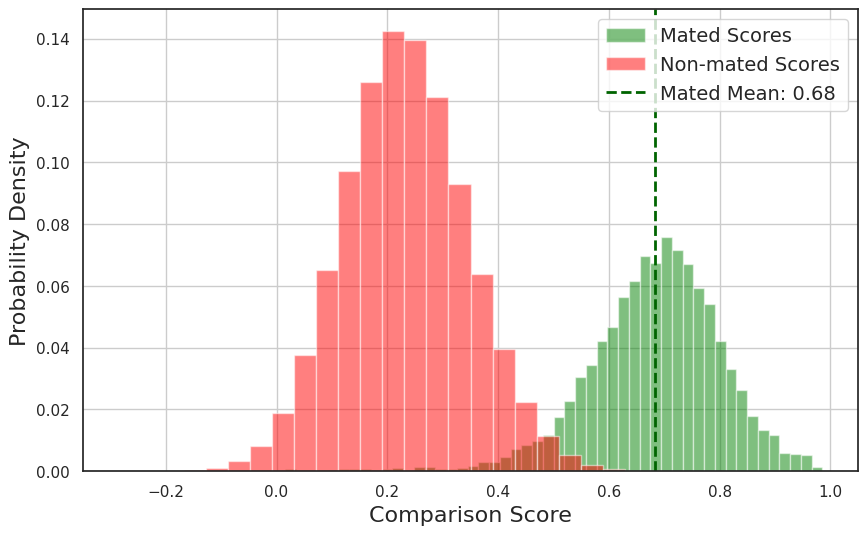

In [9]:
plot_histogram(mated_scores1, nonmated_scores1, normalise=True, title = 'Adults - MagFace ex. 2.1', save_fig_path=save_fig_path, gem_som = 'A1')


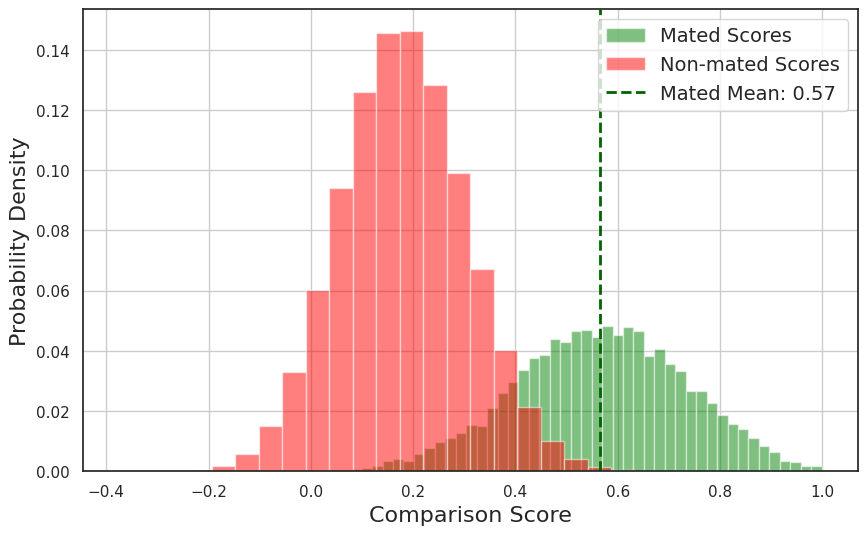

In [10]:
plot_histogram(mated_scores2, nonmated_scores2, normalise=True, title = 'Children - MagFace ex. 2.1', save_fig_path=save_fig_path, gem_som = 'C1')


# DET curves

In [11]:
d_prime_system1 = d_prime(mated_scores1, nonmated_scores1)
print("d' child =", round(d_prime_system1, round_digits))

d_prime_system2 = d_prime(mated_scores2, nonmated_scores2)
print("d' adult =", round(d_prime_system2, round_digits))


d' child = 3.89205
d' adult = 2.64671


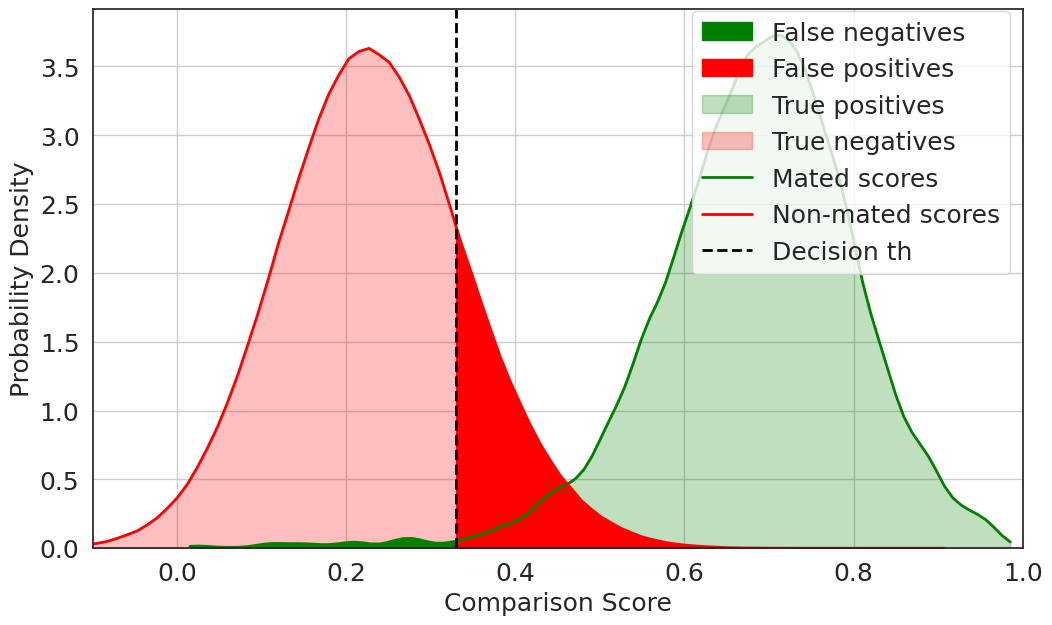

False Negatives: 1.06%


In [13]:
# threshold1 = df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
threshold1 = 0.33
kde_with_threshold(mated_scores1, nonmated_scores1, scores_type1, threshold1, save_fig_path=save_fig_path, title='A2')

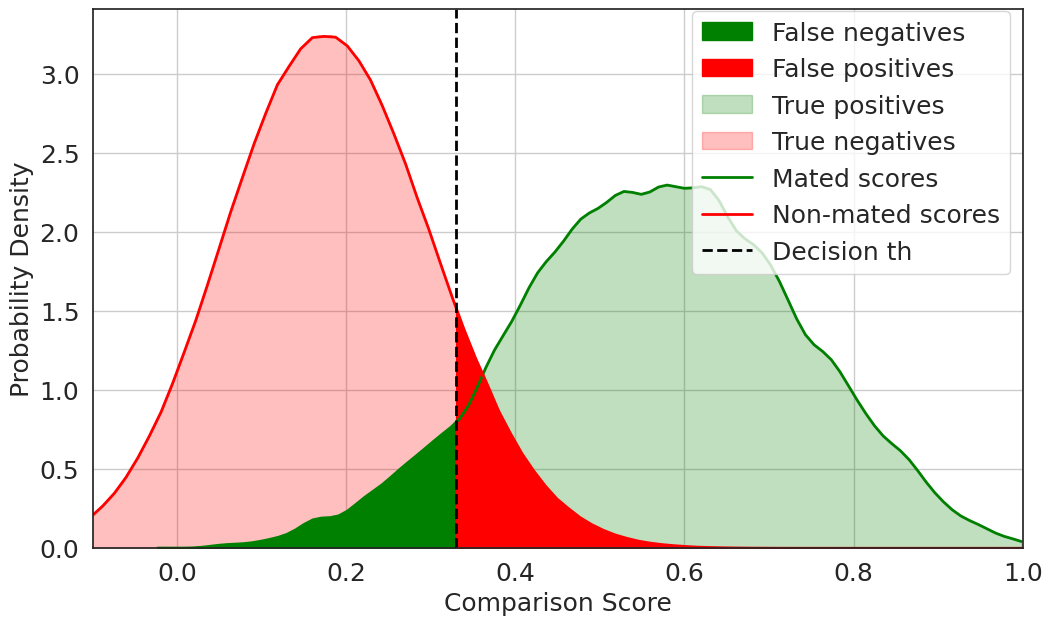

False Negatives: 8.14%


In [14]:
# threshold2 = df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
threshold2 = 0.33
kde_with_threshold(mated_scores2, nonmated_scores2, scores_type2, threshold2, save_fig_path=save_fig_path, title='C2')

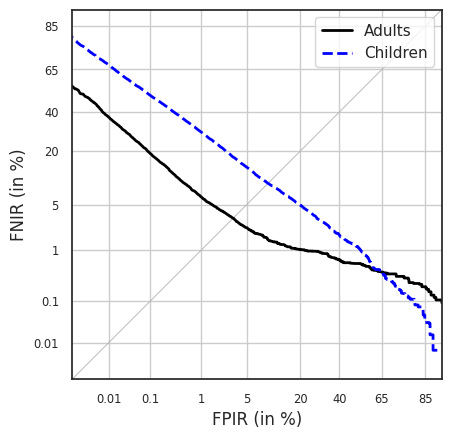

In [15]:
# Remember to save manually
import numpy as np

def DET_plotting_1_1(mated_scores1, mated_scores2,nonmated_scores1, nonmated_scores2, score_type= "similarity",title = 'Adults vs Children - MagFace ex. 2.2', save_fig_path= 'save_fig_path'):
    figure_size = (12,7)
    alpha_shade = 0.25
    alpha_fill = 1.0
    linewidth = 2
    legend_loc = "upper left"
    legend_anchor = (1.0, 1.02)
    legend_cols = 1
    legend_fontsize = 18
    label_fontsize = 18
    tick_fontsize = 18
    system_name1 = 'Adults'
    system_name2 = 'Children'

    det = DET(biometric_evaluation_type='identification', abbreviate_axes=True, plot_eer_line=True)#, plot_title=title)
    # det.x_limits = np.array([1e-5, .8])
    # det.y_limits = np.array([1e-5, .8])
    det.x_limits = np.array([1e-5, .9])
    det.y_limits = np.array([1e-5, .9])
    det.x_ticks = np.array([ 1e-4, 1e-3, 1e-2, 5e-2, 20e-2, 40e-2, 65e-2, 85e-2, 95e-2])
    det.x_ticklabels = np.array(['0.01', '0.1', '1', '5', '20', '40', '65', '85', '95'])
    det.y_ticks = np.array([ 1e-4, 1e-3, 1e-2, 5e-2, 20e-2, 40e-2, 65e-2, 85e-2, 95e-2])
    det.y_ticklabels = np.array([ '0.01', '0.1', '1', '5', '20', '40', '65', '85', '95'])

    det.create_figure()
    det.plot(tar=adjust_scores_for_DET(mated_scores1, score_type), non=adjust_scores_for_DET(nonmated_scores1, score_type), label=system_name1)
    det.plot(tar=adjust_scores_for_DET(mated_scores2, score_type), non=adjust_scores_for_DET(nonmated_scores2, score_type), label=system_name2)
    det.legend_on(loc="upper right")
    det.show()


# DET_plotting_1_1('Adults vs Children - MagFace ex. 2.1', save_fig_path= save_fig_path)


DET_plotting_1_1(mated_scores1, mated_scores2,nonmated_scores1, nonmated_scores2, "similarity",'Adults vs Children - MagFace ex. 2.1', save_fig_path= save_fig_path)
